Naive-Bayes from scratch Filip Widera

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [4]:
df = pd.read_csv("breast-cancer.csv") #Load Data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['black','red'])

In [7]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [8]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['black','red'])

In [9]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['black','red'])

<a id="3"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [10]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [13]:
corr = df.corr()

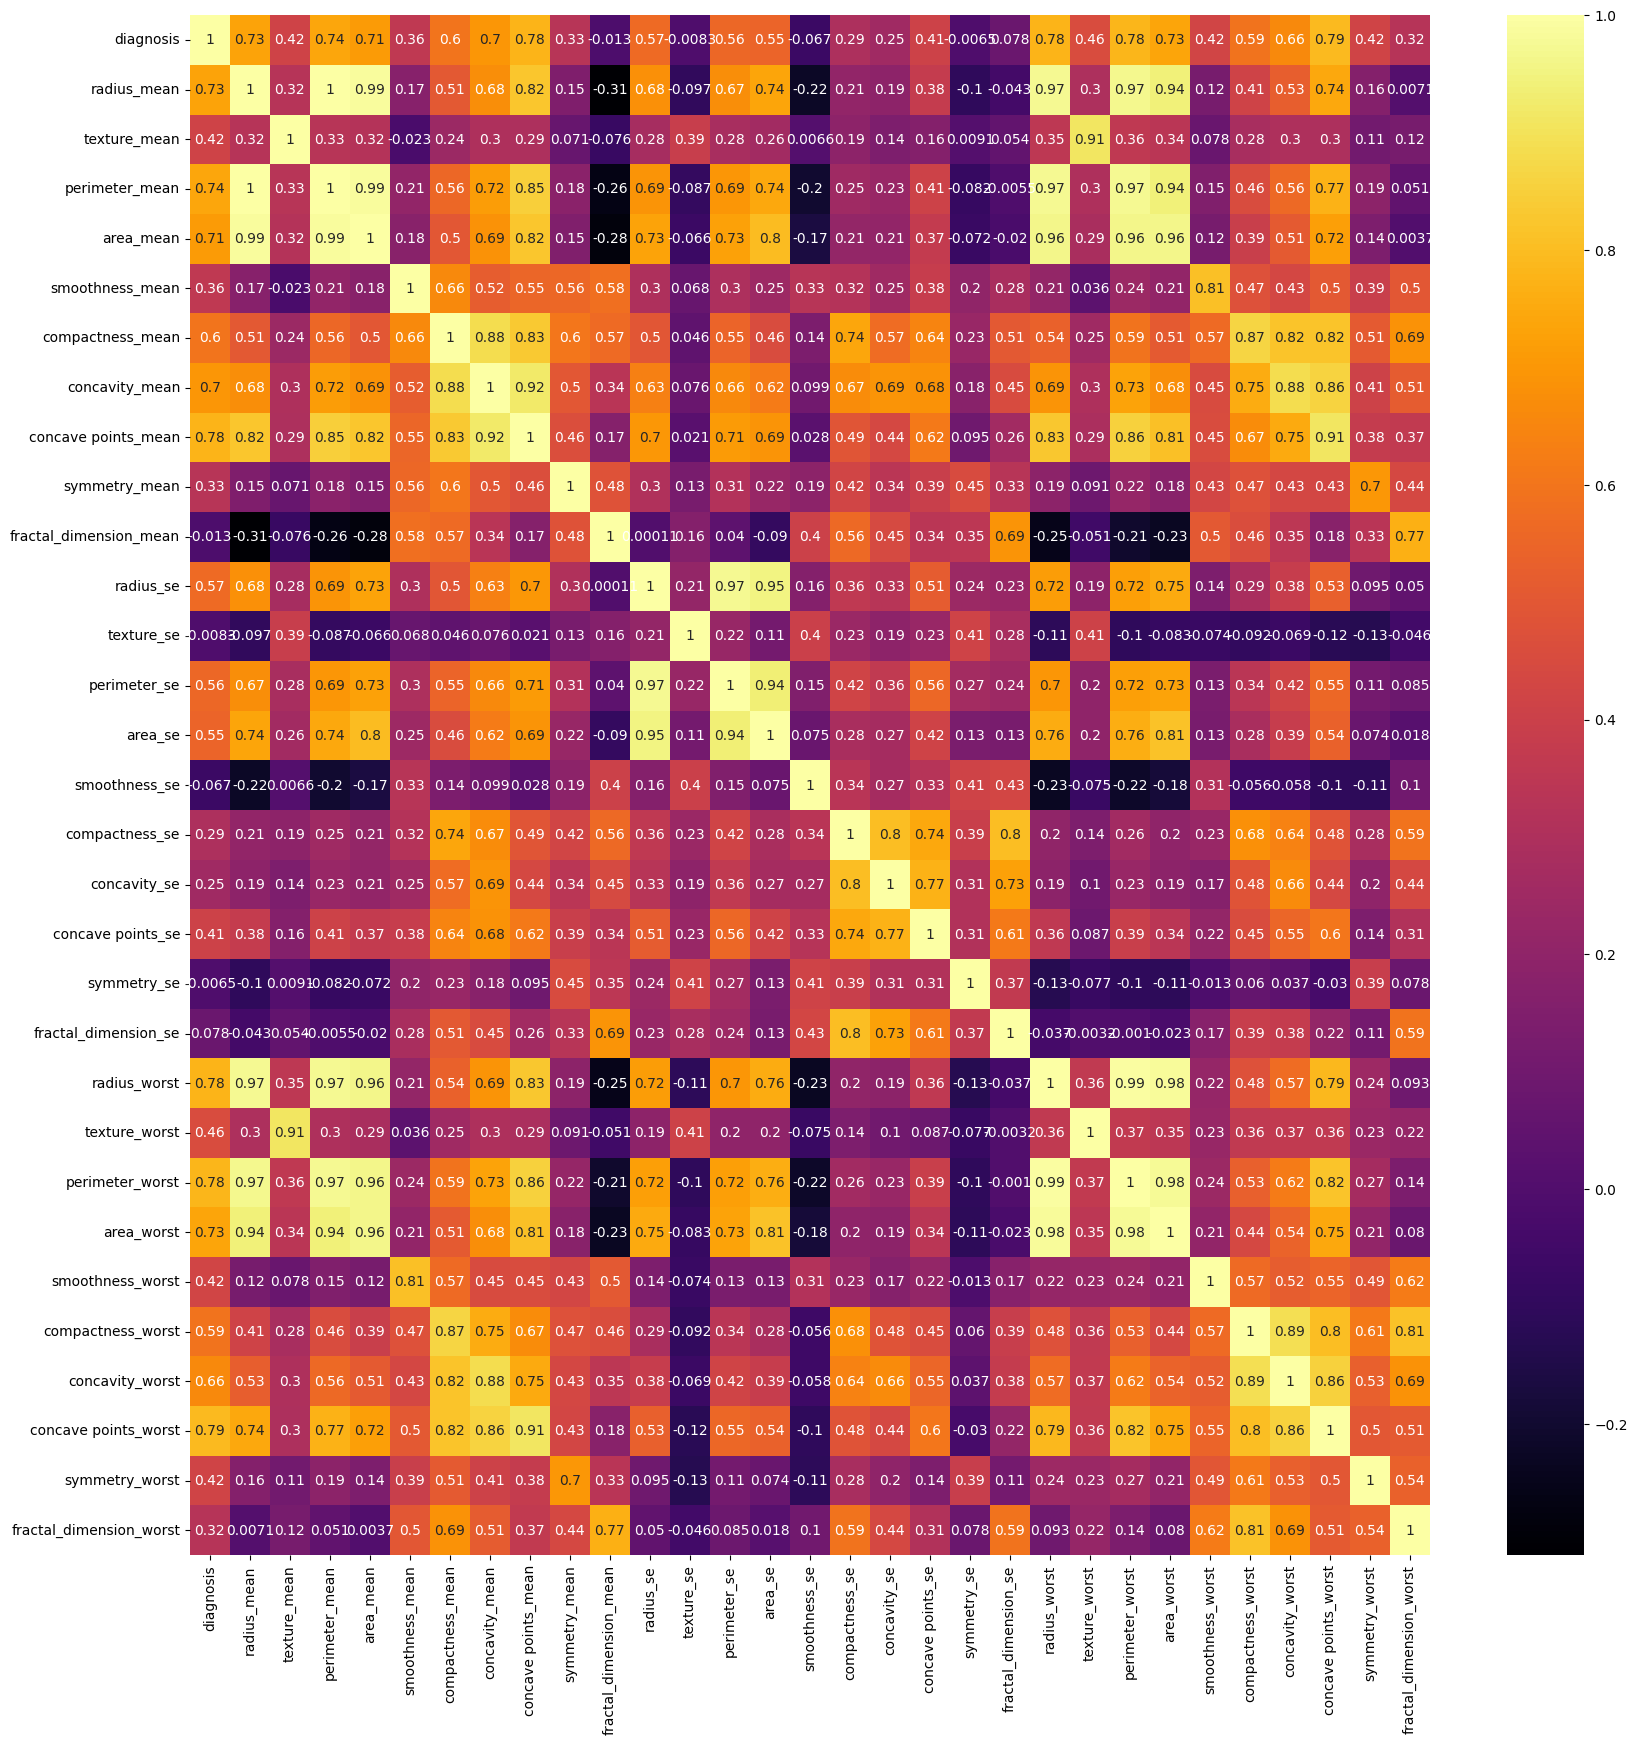

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='inferno',annot=True)
plt.show()

In [16]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [17]:
X = df[names].values
y = df['diagnosis']

In [20]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
486,0
75,1
249,0
238,0


<a id="4"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #DD2706;'>Model Implementation</center></h1>

# Model Implementation

In [31]:
import numpy as np

class NaiveBayes:
    """
    Naive Bayes classifier implementation using Gaussian distribution assumption.
    """
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Parameters:
        - X (numpy array): Training feature data of shape (n_samples, n_features).
        - y (numpy array): Target labels of shape (n_samples,).

        Returns:
        - None
        """
        eps = 1e-9
        klasa, count = np.unique(y, return_counts=True)
        # Prawdopodobieństwo każdej klasy
        Prior_0 = count[0] / (count[0] + count[1])
        Prior_1 = count[1] / (count[0] + count[1])
        # Macierze X z klasy 0 i klasy 1
        idx_0 = np.where(y == 0)[0]
        idx_1 = np.where(y == 1)[0]
        X_0 = X[idx_0]
        X_1 = X[idx_1]
        # Średnie i wariancje cech
        Mean_0 = np.mean(X_0, axis=0)
        Mean_1 = np.mean(X_1, axis=0)
        Variance_0 = np.var(X_0, axis=0)
        Variance_1 = np.var(X_1, axis=0)
        # Aby uniknąć zbyt małej wariancji
        Variance_0 = np.where(Variance_0 < eps, eps, Variance_0)
        Variance_1 = np.where(Variance_1 < eps, eps, Variance_1)
        # Zapisanie modelu
        self.Prior_0 = Prior_0
        self.Prior_1 = Prior_1
        self.Mean_0 = Mean_0
        self.Mean_1 = Mean_1
        self.Variance_0 = Variance_0
        self.Variance_1 = Variance_1

    def gaussian_density(self, x, c):
        """
        Calculate the Gaussian density function for a given feature vector and class.

        Parameters:
        - x (numpy array): Feature vector of shape (n_features,).
        - c (int): Index of the class.

        Returns:
        - numpy array: Gaussian density values for each feature.
        """
        if c == 0:
            Pierwsza_czesc = -(1/2) * np.log(2 * np.pi * self.Variance_0)
            Druga_czesc = (x - self.Mean_0)**2 / (2 * self.Variance_0)
            Gausian_density = Pierwsza_czesc - Druga_czesc
            return Gausian_density
        else:
            Pierwsza_czesc = -(1/2) * np.log(2 * np.pi * self.Variance_1)
            Druga_czesc = (x - self.Mean_1)**2 / (2 * self.Variance_1)
            Gausian_density = Pierwsza_czesc - Druga_czesc
            return Gausian_density

    def Logscore(self, x):
        """
        Calculate the probability of each class given a feature vector.

        Parameters:
        - x (numpy array): Feature vector of shape (n_features,).

        Returns:
        - int: Predicted class label.
        """
        logscore0 = np.log(self.Prior_0) + np.sum(self.gaussian_density(x, 0))
        logscore1 = np.log(self.Prior_1) + np.sum(self.gaussian_density(x, 1))
        if logscore0 > logscore1:
            return 0
        else:
            return 1

    def predict(self, X):
        """
        Predict class labels for given input data.

        Parameters:
        - X (numpy array): Input feature data of shape (n_samples, n_features).

        Returns:
        - numpy array: Predicted class labels.
        """
        wynik = []
        for record in X:
            klasa = self.Logscore(record)
            wynik.append(klasa)
        return np.array(wynik)


In [35]:
Model = NaiveBayes()
Model.fit(X_train,y_train)
predictions = Model.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

Evaluation


In [36]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [38]:
wynik = accuracy(y_test,predictions)
wynik

np.float64(0.9649122807017544)